In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler as ss
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier




In [5]:
df = pd.read_csv('bankloan.csv')
df = df.dropna()
df.isna().any()
df = df.drop('Loan_ID', axis=1)
df['LoanAmount'] = (df['LoanAmount']*1000).astype(int)
Counter(df['Loan_Status'])['Y']/df['Loan_Status'].size

0.6916666666666667

In [6]:
pred_y = df['Loan_Status']
pred_x = df.drop('Loan_Status', axis=1)
dm_x = pd.get_dummies(pred_x)
dm_y = pred_y.map(dict(Y = 1 ,N = 0))
pred_y.shape

(480,)

In [7]:
smote= SMOTE(sampling_strategy='auto')
X1,y = smote.fit_resample(dm_x,dm_y)
sc=MinMaxScaler()
x=sc.fit_transform(X1)

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42, shuffle= True)

In [9]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [10]:
prediction=model.predict(x_test)
print("the accuracy is ", metrics.accuracy_score(prediction,y_test))

the accuracy is  0.8270676691729323


[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

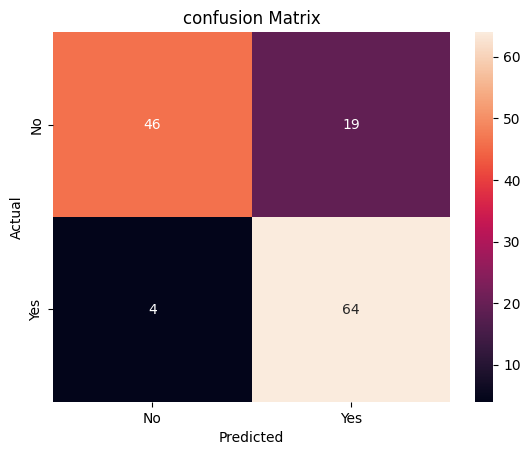

In [11]:
from sklearn.metrics import confusion_matrix

cn =confusion_matrix(y_test, prediction)
ax=plt.subplot()

sns.heatmap(cn, annot=True, ax = ax);

ax.set_xlabel('Predicted'); ax.set_ylabel('Actual');
ax.set_title('confusion Matrix');
ax.xaxis.set_ticklabels(['No', 'Yes']);ax.yaxis.set_ticklabels(['No','Yes'])

In [12]:
from joblib import dump

dump(model,'Model.joblib')


['Model.joblib']